<a href="https://colab.research.google.com/github/prandin/DeepLearning/blob/master/1_ShallowKerasMNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# A Shallow Network in Keras - MNIST Handwritten Digits
By the end of this exercise, you are expected to 


1.   Load the Data and Understand Software Dependencies [not exciting :(]
2.   Reformat input data using flatten()
3.   Use Keras to design a shallow, sequential neural network [the exciting part]
4.   Train the model using summary() and compile() functions.



**Software Dependencies**

In [ ]:
import keras
from tensorflow.keras.utils import to_categorical
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD
from matplotlib import pyplot as plt

**Loading the Data**

In [ ]:
(X_train, y_train), (X_valid, y_valid) = mnist.load_data()
X_train.shape

(60000, 28, 28)

Observe that there there 60,000 images in the training dataset, each being 28x28

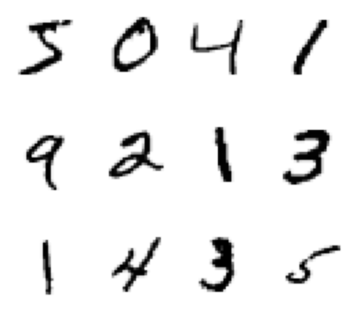

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4, 3, 5], dtype=uint8)

In [ ]:
plt.figure(figsize=(5, 5))
for k in range(12):
  plt.subplot(3, 4, k+1)
  plt.imshow(X_train[k], cmap = 'Greys')
  plt.axis('off')
plt.tight_layout()
plt.show()
y_train[0:12]

In [ ]:
X_train = X_train.reshape(60000, 28**2).astype('float32')
X_valid = X_valid.reshape(10000, 28**2).astype('float32') #to convert pixel darkness from integers to single precision floating points
X_train /= 255
X_valid /= 255

In [ ]:
n_classes = 10 #0 - 9
y_train = to_categorical(y_train, n_classes)
y_valid = to_categorical(y_valid, n_classes) #convert to one-hot encoding to line up with output probabilities

In [ ]:
model = Sequential() #simplest model
#Dense means fully connected
#784 = 28*28
model.add(Dense(64, activation='sigmoid', input_shape = (784, ))) #1D array of length 784 is the input
model.add(Dense(10, activation='softmax'))

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 64)                50240     
_________________________________________________________________
dense_3 (Dense)              (None, 10)                650       
Total params: 50,890
Trainable params: 50,890
Non-trainable params: 0
_________________________________________________________________


**Question 1:** Find the total number of parameters associated with Dense1 (hidden) layer.

784 input neurons * 64 Dense1 neurons = 50176 weights.

Total number of biases = 64

Total number of parameters = 50176 + 64 = 50240

**Question 2:** Can we replace the sigmoid neurons in this example with perceptrons? Why or why not?

**Question 3:** Find the limit of the sigmoid function as input approaches 0.

**Question 4:** Why are nonlinear activations important in deep learning?

In [ ]:
model.compile(loss='mean_squared_error', optimizer=SGD(learning_rate=0.01), metrics=['accuracy'])

In [ ]:
model.fit(X_train, y_train, batch_size = 128, epochs = 200, verbose=1, validation_data = (X_valid, y_valid))
#verbose is set to receive feedback

Epoch 1/200
469/469 [==============================] - 2s 3ms/step - loss: 0.0936 - accuracy: 0.1443 - val_loss: 0.0921 - val_accuracy: 0.1550
Epoch 2/200
469/469 [==============================] - 1s 3ms/step - loss: 0.0918 - accuracy: 0.1565 - val_loss: 0.0910 - val_accuracy: 0.1717
Epoch 3/200
469/469 [==============================] - 1s 3ms/step - loss: 0.0909 - accuracy: 0.1719 - val_loss: 0.0903 - val_accuracy: 0.1892
Epoch 4/200
469/469 [==============================] - 1s 2ms/step - loss: 0.0900 - accuracy: 0.1903 - val_loss: 0.0897 - val_accuracy: 0.2078
Epoch 5/200
469/469 [==============================] - 1s 2ms/step - loss: 0.0896 - accuracy: 0.2044 - val_loss: 0.0892 - val_accuracy: 0.2260
Epoch 6/200
469/469 [==============================] - 1s 2ms/step - loss: 0.0891 - accuracy: 0.2225 - val_loss: 0.0888 - val_accuracy: 0.2439
Epoch 7/200
469/469 [==============================] - 1s 2ms/step - loss: 0.0887 - accuracy: 0.2419 - val_loss: 0.0884 - val_accuracy: 0.2629

In [ ]:
model.evaluate(X_valid, y_valid)

313/313 [==============================] - 0s 1ms/step - loss: 0.0278 - accuracy: 0.8622


[0.02779850736260414, 0.8622000217437744]